# **Logistic Regression**


Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


It is generally used for **Binary classification.**

Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

**The assumption in logistic regression**
1. Logistic regression requires the dependent variable to be binary.
2. Classes are almost linearly separable points.
3. Requires little or no multicollinearity among the independent variables.
4. Typically requires a large sample size.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:

col1=data.columns

In [ ]:
a=pd.get_dummies(data["Gender"],drop_first=True)
col2=a.columns

In [ ]:
col1.append(col2)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Male'], dtype='object')

In [ ]:
final=pd.concat([data,a],ignore_index=True,axis=1)
final.columns=col1.append(col2)
final

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [ ]:
final=final.drop(["User ID","Gender"],axis=1)
final

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [ ]:
X=final.drop(["Purchased"],axis=1)
Y=final["Purchased"]

In [ ]:
X=X.values
y=Y.values.reshape(-1,1)

In [ ]:
X

array([[1.0e+00, 1.9e+01, 1.9e+04, 1.0e+00],
       [1.0e+00, 3.5e+01, 2.0e+04, 1.0e+00],
       [1.0e+00, 2.6e+01, 4.3e+04, 0.0e+00],
       ...,
       [1.0e+00, 5.0e+01, 2.0e+04, 0.0e+00],
       [1.0e+00, 3.6e+01, 3.3e+04, 1.0e+00],
       [1.0e+00, 4.9e+01, 3.6e+04, 0.0e+00]])

In [ ]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Logistic regression using stats model**

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(X)
logm1 = sm.Logit(y_train,X_train)
logm1.fit().summary()


Optimization terminated successfully.
         Current function value: 0.370526
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  268
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.4217
Time:                        05:29:01   Log-Likelihood:                -99.301
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                 3.428e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.0430      1.383     -7.983      0.000     -13.754      -8.332
x1             0.1954      0.027      7.282      0.000       0.143       0.248
x2          3.467e-05   6.09e-06      5.688      0.000    2.27e-05    4.66e-05
x3             0.1690      0.359      0.471      0.638      -0.535       0.873
==============================================================================
"""

**Logistic regression using sk learn**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=33)
clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=33)

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test.reshape(-1)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

# **Model Evaluation**


Follow General Procedure


# **Mathematical and Geometrical Intuition:**


**Why Can’t we use Linear Regression for Classification?**

If everything is fine we can use linear regression, why logistic regression is needed.

a. Outlier: If the data set has an outlier, linear regression will not perform better.

b. High-end classification: Can be classified as >1 or <0 which is an issue.

c. Requires little or no multicollinearity among the independent variables.

d . Typically requires a large sample size.


**Intuition:**

Step -1-3:

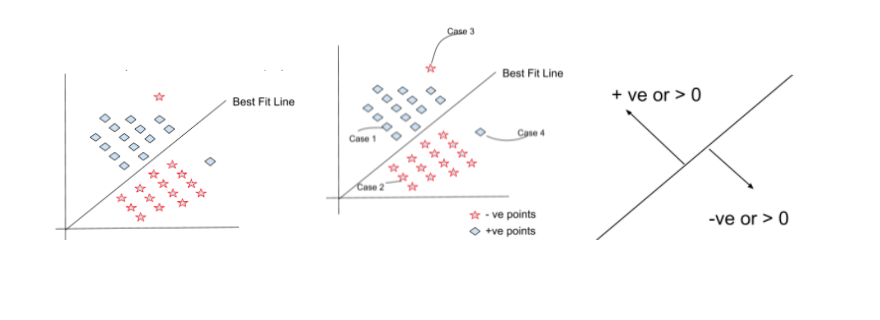


From Linear Algebra we have,

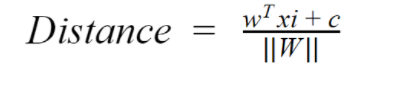


The above formula will be modified as

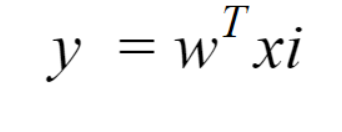


Based on the above formulation we will have the following distance cases based on the classification in the above pic

Case 1: As per the given data yi = +1 & wt * xi > 0
Yi * wt * xi > 0

Case 2: As per the given data yi = -1 & wt * xi < 0
Yi * wt * xi > 0

Case 3: As per the given data yi = -1 & wt * xi > 0
Yi * wt * xi < 0

Case 4: As per the given data yi = +1 & wt * xi < 0
Yi * wt * xi < 0

Here Case 1 & Case 2 are correctly classified points but Case 3 & Case 4 are wrongly classified points.

Summing up the calculated distances & finding the arg max.

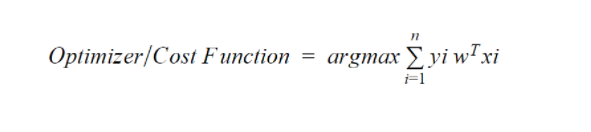

By Changing the W transpose value we can drive our best fit line, as we have the yi & xi are fixed (from the dataset).

Finally we need to Maximize correctly classified points & Minimize wrongly classified points.

The above intuition is highly affected by Outliers.


The simple answer is to implement the Sigmoid function outlier & to optimize the formula as below.


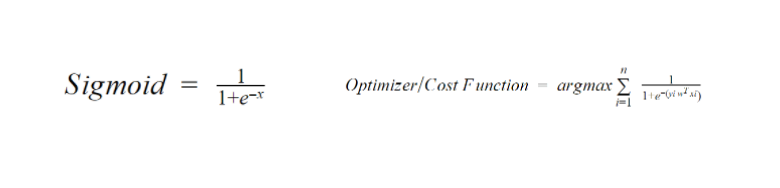            


The sigmoid function will get our outlier values within our range which will result in the squashing technique for reducing the outlier issue.
